# Importing Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression , Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error , median_absolute_error , r2_score

# Reading Data

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
df1 = pd.read_csv('/gdrive/MyDrive/Data/Cyclic Direct Simple Shear Tests Uniform Loadings/UCDSS 100 kPa/eo_0_598_sigv_100_CSR_0_11.csv')
df2 = pd.read_csv('/gdrive/MyDrive/Data/Cyclic Direct Simple Shear Tests Uniform Loadings/UCDSS 100 kPa/eo_0_598_sigv_100_CSR_0_13.csv')
df3 = pd.read_csv('/gdrive/MyDrive/Data/Cyclic Direct Simple Shear Tests Uniform Loadings/UCDSS 100 kPa/eo_0_598_sigv_100_CSR_0_14.csv')
df4 = pd.read_csv('/gdrive/MyDrive/Data/Cyclic Direct Simple Shear Tests Uniform Loadings/UCDSS 100 kPa/eo_0_598_sigv_100_CSR_0_15.csv')
df5 = pd.read_csv('/gdrive/MyDrive/Data/Cyclic Direct Simple Shear Tests Uniform Loadings/UCDSS 100 kPa/eo_0_598_sigv_100_CSR_0_16.csv')
df1['CSR'] = 0.11
df2['CSR'] = 0.13
df3['CSR'] = 0.14
df4['CSR'] = 0.15
df5['CSR'] = 0.16
df=pd.concat([df1, df2, df3, df4, df5])
df['Load in KPa'] = 100
df

,\r\nCycle,Shear\r\nStrain,Shear\r\nStress,Axial\r\nStrain,Axial\r\nStress,Unnamed: 5,CSR,Load in KPa
0,0.008,0.006439,0.49368,0.001288,99.657,NaN,0.11,100
1,0.016,0.019238,1.11230,0.000435,99.291,NaN,0.11,100
2,0.023,0.029984,1.78800,0.000429,98.923,NaN,0.11,100
3,0.031,0.034344,2.02840,0.000859,98.710,NaN,0.11,100
4,0.039,0.045010,2.73230,0.000859,98.291,NaN,0.11,100
...,...,...,...,...,...,...,...,...
1531,11.969,-6.078900,-3.33060,0.120140,17.992,NaN,0.16,100
1532,11.977,-6.007200,-2.55270,0.120580,16.354,NaN,0.16,100
1533,11.984,-5.922900,-1.93060,0.122300,14.618,NaN,0.16,100
1534,11.992,-5.794100,-1.20580,0.122730,12.424,NaN,0.16,100


In [ ]:
ff1 = pd.read_csv('/gdrive/MyDrive/Data/Cyclic Direct Simple Shear Tests Uniform Loadings/UCDSS 40 kPa/eo_0_601_sigv_40_CSR_0_12.csv')
ff2 = pd.read_csv('/gdrive/MyDrive/Data/Cyclic Direct Simple Shear Tests Uniform Loadings/UCDSS 40 kPa/eo_0_601_sigv_40_CSR_0_13.csv')
ff3 = pd.read_csv('/gdrive/MyDrive/Data/Cyclic Direct Simple Shear Tests Uniform Loadings/UCDSS 40 kPa/eo_0_601_sigv_40_CSR_0_14.csv')
ff4 = pd.read_csv('/gdrive/MyDrive/Data/Cyclic Direct Simple Shear Tests Uniform Loadings/UCDSS 40 kPa/eo_0_601_sigv_40_CSR_0_15.csv')
ff5 = pd.read_csv('/gdrive/MyDrive/Data/Cyclic Direct Simple Shear Tests Uniform Loadings/UCDSS 40 kPa/eo_0_601_sigv_40_CSR_0_16.csv')
ff6 = pd.read_csv('/gdrive/MyDrive/Data/Cyclic Direct Simple Shear Tests Uniform Loadings/UCDSS 40 kPa/eo_0_601_sigv_40_CSR_0_17.csv')
ff1['CSR'] = 0.12
ff2['CSR'] = 0.13
ff3['CSR'] = 0.14
ff4['CSR'] = 0.15
ff5['CSR'] = 0.16
ff6['CSR'] = 0.17
ff=pd.concat([ff1, ff2, ff3, ff4, ff5, ff6])
ff['Load in KPa']=40
ff

,\r\nCycle,Shear\r\nStrain,Shear\r\nStress,Axial\r\nStrain,Axial\r\nStress,Unnamed: 5,CSR,Load in KPa
0,0.008,0.000280,0.26440,0.002010,40.73929,NaN,0.12,40
1,0.016,0.002309,0.40170,0.002130,40.67529,NaN,0.12,40
2,0.023,0.005608,0.58551,0.002190,40.58729,NaN,0.12,40
3,0.031,0.010255,0.80610,0.002157,40.47929,NaN,0.12,40
4,0.039,0.016155,1.04920,0.002006,40.35929,NaN,0.12,40
...,...,...,...,...,...,...,...,...
1787,13.969,-5.840100,-1.42780,0.040557,8.06770,NaN,0.17,40
1788,13.977,-5.793700,-1.07490,0.040541,7.40970,NaN,0.17,40
1789,13.984,-5.719300,-0.69882,0.040952,6.56420,NaN,0.17,40
1790,13.992,-5.637500,-0.39895,0.041783,5.74220,NaN,0.17,40


In [ ]:
D=pd.concat([df, ff])
D= D.rename(columns={"Unnamed: 5":"Pet"})
D=D.drop(['Pet'], axis = 1)
D = D[["\r\nCycle",	"Shear\r\nStrain",	"Shear\r\nStress",	"Axial\r\nStrain",	"Axial\r\nStress"	,"Load in KPa", "CSR"]]
D


,\r\nCycle,Shear\r\nStrain,Shear\r\nStress,Axial\r\nStrain,Axial\r\nStress,Load in KPa,CSR
0,0.008,0.006439,0.49368,0.001288,99.6570,100,0.11
1,0.016,0.019238,1.11230,0.000435,99.2910,100,0.11
2,0.023,0.029984,1.78800,0.000429,98.9230,100,0.11
3,0.031,0.034344,2.02840,0.000859,98.7100,100,0.11
4,0.039,0.045010,2.73230,0.000859,98.2910,100,0.11
...,...,...,...,...,...,...,...
1787,13.969,-5.840100,-1.42780,0.040557,8.0677,40,0.17
1788,13.977,-5.793700,-1.07490,0.040541,7.4097,40,0.17
1789,13.984,-5.719300,-0.69882,0.040952,6.5642,40,0.17
1790,13.992,-5.637500,-0.39895,0.041783,5.7422,40,0.17


In [ ]:
D.reset_index(inplace = True)
D=D.drop(['index'], axis = 1)
D

,\r\nCycle,Shear\r\nStrain,Shear\r\nStress,Axial\r\nStrain,Axial\r\nStress,Load in KPa,CSR
0,0.008,0.006439,0.49368,0.001288,99.6570,100,0.11
1,0.016,0.019238,1.11230,0.000435,99.2910,100,0.11
2,0.023,0.029984,1.78800,0.000429,98.9230,100,0.11
3,0.031,0.034344,2.02840,0.000859,98.7100,100,0.11
4,0.039,0.045010,2.73230,0.000859,98.2910,100,0.11
...,...,...,...,...,...,...,...
129659,13.969,-5.840100,-1.42780,0.040557,8.0677,40,0.17
129660,13.977,-5.793700,-1.07490,0.040541,7.4097,40,0.17
129661,13.984,-5.719300,-0.69882,0.040952,6.5642,40,0.17
129662,13.992,-5.637500,-0.39895,0.041783,5.7422,40,0.17


In [ ]:
D.dropna()

,\r\nCycle,Shear\r\nStrain,Shear\r\nStress,Axial\r\nStrain,Axial\r\nStress,Load in KPa,CSR
0,0.008,0.006439,0.49368,0.001288,99.6570,100,0.11
1,0.016,0.019238,1.11230,0.000435,99.2910,100,0.11
2,0.023,0.029984,1.78800,0.000429,98.9230,100,0.11
3,0.031,0.034344,2.02840,0.000859,98.7100,100,0.11
4,0.039,0.045010,2.73230,0.000859,98.2910,100,0.11
...,...,...,...,...,...,...,...
129659,13.969,-5.840100,-1.42780,0.040557,8.0677,40,0.17
129660,13.977,-5.793700,-1.07490,0.040541,7.4097,40,0.17
129661,13.984,-5.719300,-0.69882,0.040952,6.5642,40,0.17
129662,13.992,-5.637500,-0.39895,0.041783,5.7422,40,0.17


In [ ]:
X = D.iloc[:,0:6]
Y = D.iloc[:,6]

# Preprocessing Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(Y)
Y = pd.get_dummies(y1).values

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size = 0.25) 

# Random Forest Classifier

In [ ]:
#training and testing the model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier()
random=clf.fit(X_train,y_train)

y_pred_RF =random.predict(X_test)
print('ground truth           :',y_test)
print('predicted class        :',y_pred_RF)
print('ground truth           :',y_test)
print('predicted class        :',y_pred_RF)
print('cross validation acc   :',cross_val_score(random,X_test,y_test).mean())

ground truth           : [[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
predicted class        : [[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
ground truth           : [[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
predicted class        : [[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
cross validation acc   : 0.9900974722196134


Confusion matrix, without normalization
[[ 9677     0     0     0     0     0     0]
 [    1 11834     6     0     0     0     0]
 [    7     3  5242     1     0     0     0]
 [    1     0     0  2577     3     0     0]
 [    4     0     0     3  1645     0     0]
 [    8     0     0     0     3   941     6]
 [    5     0     0     0     0     8   441]]
Normalized confusion matrix
[[1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [8.45e-05 9.99e-01 5.07e-04 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [1.33e-03 5.71e-04 9.98e-01 1.90e-04 0.00e+00 0.00e+00 0.00e+00]
 [3.87e-04 0.00e+00 0.00e+00 9.98e-01 1.16e-03 0.00e+00 0.00e+00]
 [2.42e-03 0.00e+00 0.00e+00 1.82e-03 9.96e-01 0.00e+00 0.00e+00]
 [8.35e-03 0.00e+00 0.00e+00 0.00e+00 3.13e-03 9.82e-01 6.26e-03]
 [1.10e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.76e-02 9.71e-01]]


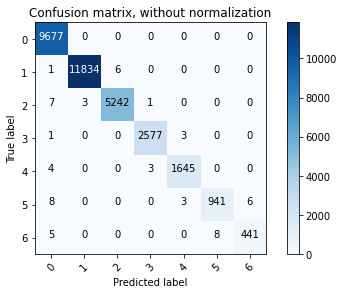

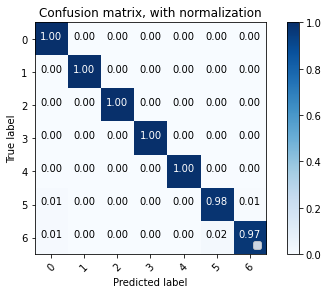

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_RF.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names=['0','1','2','3','4','5','6']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix, with normalization')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

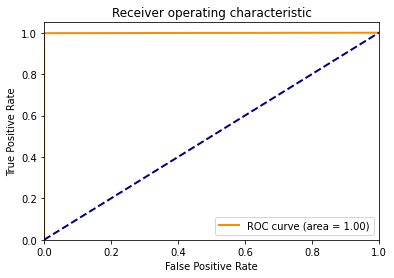

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
n_classes=Y.shape[1]
#y_test=Y_val
y_score=y_pred_RF
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

 #Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

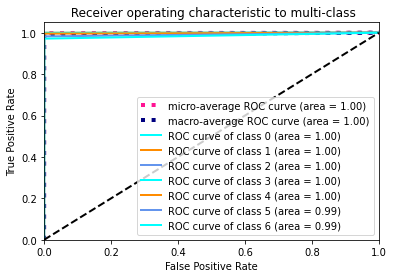

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Decision tree classifier – 
A decision tree classifier is a systematic approach for multiclass classification. It poses a set of questions to the dataset (related to its attributes/features). The decision tree classification algorithm can be visualized on a binary tree. On the root and each of the internal nodes, a question is posed and the data on that node is further split into separate records that have different characteristics. The leaves of the tree refer to the classes in which the dataset is split. In the following code snippet, we train a decision tree classifier in scikit-learn

In [ ]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

 
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
 
# creating a confusion matrix
#cm = confusion_matrix(y_test, dtree_predictions)

Confusion matrix, without normalization
[[9677    0    0    0    0    0    0]
 [3019 8822    0    0    0    0    0]
 [5253    0    0    0    0    0    0]
 [2581    0    0    0    0    0    0]
 [1652    0    0    0    0    0    0]
 [ 958    0    0    0    0    0    0]
 [ 454    0    0    0    0    0    0]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.  ]
 [0.25 0.75 0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.  ]]


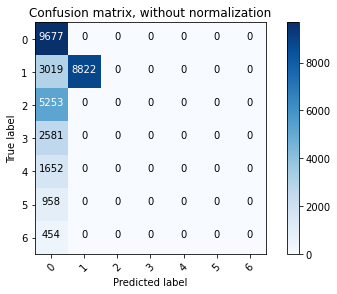

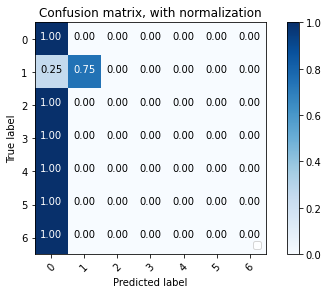

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), dtree_predictions.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names=['0','1','2','3','4','5','6']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix, with normalization')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

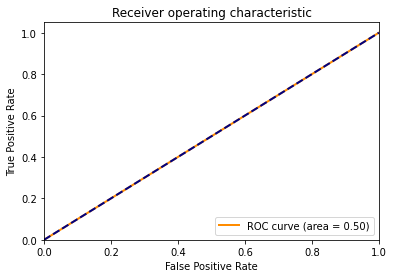

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
n_classes=Y.shape[1]
#y_test=Y_val
y_score=dtree_predictions
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

 #Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

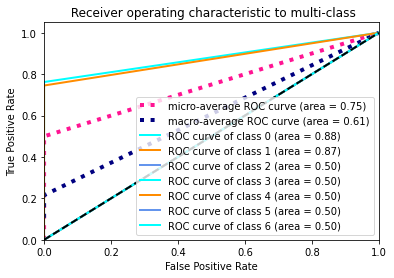

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# KNN (k-nearest neighbors) classifier – 
KNN or k-nearest neighbors is the simplest classification algorithm. This classification algorithm does not depend on the structure of the data. Whenever a new example is encountered, its k nearest neighbors from the training data are examined. Distance between two examples can be the euclidean distance between their feature vectors. The majority class among the k nearest neighbors is taken to be the class for the encountered example. 

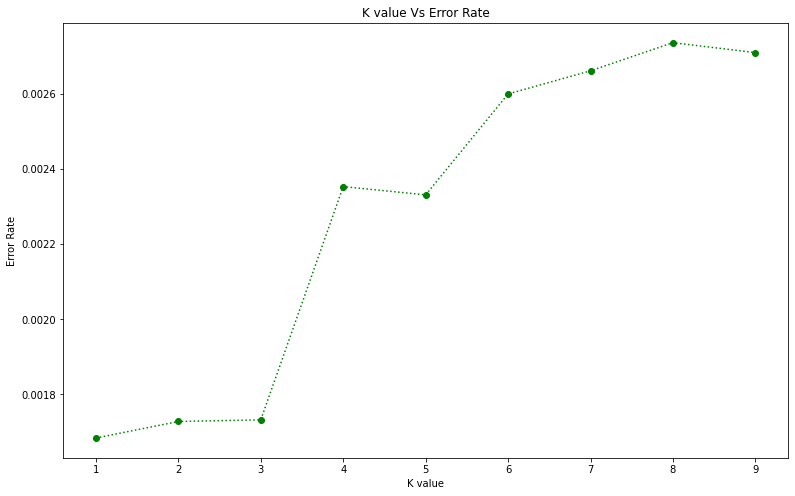

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,10):
             knn = KNeighborsClassifier(n_neighbors=i)
             model = knn.fit(X_train,y_train)
             pred_i = knn.predict(X_test)
             error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(13,8))
plt.plot(range(1,10), error_rate, linestyle = 'dotted', marker = 'o',color = 'g')
plt.xlabel('K value')
plt.ylabel('Error Rate')
plt.title('K value Vs Error Rate')
plt.show() 

In [ ]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

 
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print (accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test)


0.994107847976308


Confusion matrix, without normalization
[[ 9675     0     1     1     0     0     0]
 [    0 11793    46     0     1     1     0]
 [   15    43  5179    12     2     2     0]
 [    3     0     7  2570     1     0     0]
 [    0     0     1     4  1645     1     1]
 [    0     3     0     3     4   929    19]
 [    0     3     0     0     2    15   434]]
Normalized confusion matrix
[[1.00e+00 0.00e+00 1.03e-04 1.03e-04 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 9.96e-01 3.88e-03 0.00e+00 8.45e-05 8.45e-05 0.00e+00]
 [2.86e-03 8.19e-03 9.86e-01 2.28e-03 3.81e-04 3.81e-04 0.00e+00]
 [1.16e-03 0.00e+00 2.71e-03 9.96e-01 3.87e-04 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 6.05e-04 2.42e-03 9.96e-01 6.05e-04 6.05e-04]
 [0.00e+00 3.13e-03 0.00e+00 3.13e-03 4.18e-03 9.70e-01 1.98e-02]
 [0.00e+00 6.61e-03 0.00e+00 0.00e+00 4.41e-03 3.30e-02 9.56e-01]]


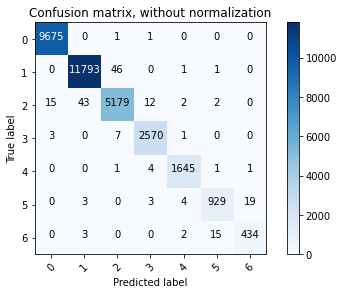

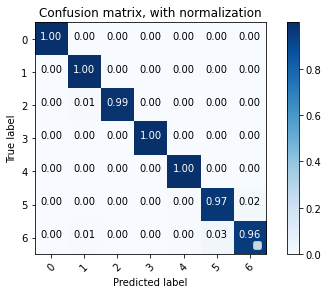

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), knn_predictions.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names=['0','1','2','3','4','5','6']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix, with normalization')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

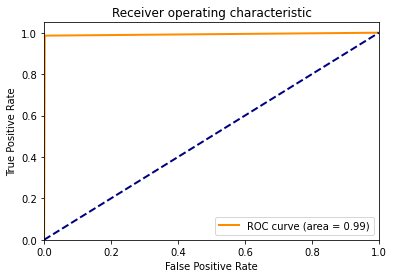

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
n_classes=Y.shape[1]
y_score=knn_predictions
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

 #Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

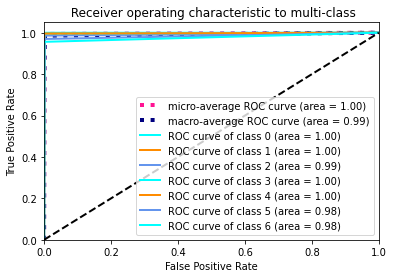

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Extra Tree

In [ ]:
#training and testing the model
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

extrarandom=ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
extrarandom=extrarandom.fit(X_train,y_train)

y_pred_ET =extrarandom.predict(X_test)
print('ground truth           :',y_test)
print('predicted class        :',y_pred_ET)
print('ground truth           :',y_test)
print('predicted class        :',y_pred_ET)
print('cross validation acc   :',cross_val_score(extrarandom,X_test,y_test).mean())

ground truth           : [[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
predicted class        : [[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
ground truth           : [[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
predicted class        : [[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
cross validation acc   : 0.9878455045383727


Confusion matrix, without normalization
[[ 9677     0     0     0     0     0     0]
 [    5 11834     2     0     0     0     0]
 [    6     2  5245     0     0     0     0]
 [    4     0     0  2574     3     0     0]
 [    8     0     0     0  1643     1     0]
 [   12     0     0     0     2   941     3]
 [    6     0     0     0     0     1   447]]
Normalized confusion matrix
[[1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [4.22e-04 9.99e-01 1.69e-04 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [1.14e-03 3.81e-04 9.98e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [1.55e-03 0.00e+00 0.00e+00 9.97e-01 1.16e-03 0.00e+00 0.00e+00]
 [4.84e-03 0.00e+00 0.00e+00 0.00e+00 9.95e-01 6.05e-04 0.00e+00]
 [1.25e-02 0.00e+00 0.00e+00 0.00e+00 2.09e-03 9.82e-01 3.13e-03]
 [1.32e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 2.20e-03 9.85e-01]]


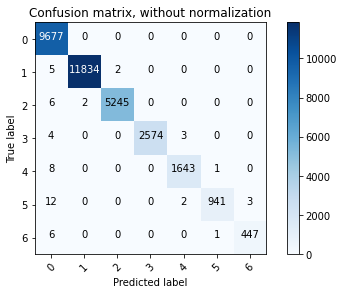

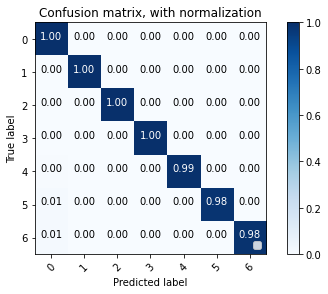

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred_ET.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names=['0','1','2','3','4','5','6']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix, with normalization')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

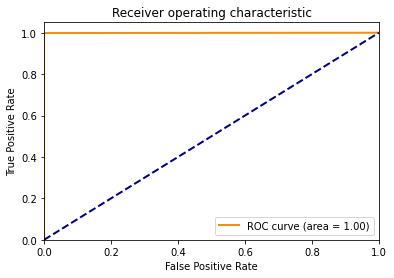

In [ ]:
n_classes=Y.shape[1]
y_score=y_pred_ET
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

 #Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

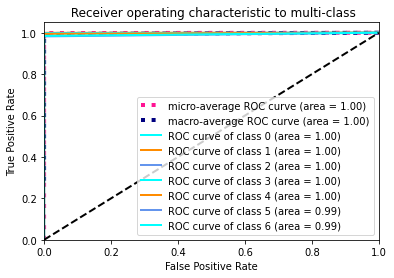

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()